**Ant Colony Optimization for finding shortest path**

In [1749]:
filename = 'graph.json'

In [1750]:
import json
import numpy as np

In [1751]:
with open(filename, 'r') as file:
    graph = json.load(file)
graph = {key: {inner_key: inner_value['weight'] for inner_key, inner_value in value.items()} for key, value in graph.items()}

**Creating a pheromone graph**

In [1752]:
pheromone_graph = {key: {inner_key: 1.0 for inner_key, inner_value in value.items()} for key, value in graph.items()}

**Letting the ants travel between starting point and ending point at random**

In [1753]:
import random as rdm

def ant(node='0', goal='29'):
    path, hash_set = [], set()
    while True:
        if node == goal:
            return path + [node]

        pheromones = pheromone_graph[node]
        total_pheromone = sum(pheromones.values())
        probabilities = [pheromones[neighbor] / total_pheromone for neighbor in pheromones]

        current_choice = rdm.choices(list(pheromones.keys()), probabilities)[0]

        if current_choice not in hash_set:
            path.append(node)
            hash_set.add(node)
            node = current_choice
        else:
            return None


ant_paths = [ant() for _ in range(10)]
ant_paths


[['0', '4', '9', '17', '18', '20', '22', '27', '28', '29'],
 ['0', '4', '5', '8', '11', '12', '15', '22', '23', '24', '26', '28', '29'],
 ['0', '3', '9', '15', '22', '23', '26', '28', '29'],
 ['0', '1', '2', '8', '15', '22', '23', '24', '25', '27', '29'],
 ['0',
  '1',
  '5',
  '10',
  '14',
  '18',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29'],
 ['0', '2', '5', '10', '14', '20', '26', '27', '28', '29'],
 ['0', '4', '10', '11', '19', '24', '27', '29'],
 ['0', '4', '5', '12', '15', '16', '18', '23', '24', '28', '29'],
 ['0',
  '3',
  '6',
  '8',
  '10',
  '12',
  '15',
  '20',
  '21',
  '22',
  '23',
  '24',
  '26',
  '27',
  '28',
  '29'],
 ['0', '2', '9', '17', '24', '26', '27', '28', '29']]

**Updating the pheromone matrix**

In [1754]:
pheromone_number = 0.001
number_of_ants = 500
iterations = 10

best_path_cost = float('inf')
best_path = None

for _ in range(iterations):
    for path in ant_paths:
        cost = 0
        for i in range(len(path) - 1):
            cost += graph[path[i]][path[i + 1]]

        pheromones_to_deposit = pheromone_number / cost

        for i in range(len(path) - 1):
            pheromone_graph[path[i]][path[i + 1]] += pheromones_to_deposit


    ant_paths = [ant() for _ in range(number_of_ants)]

shortest_path = min(ant_paths, key=lambda x: sum(graph[x[i]][x[i + 1]] for i in range(len(x) - 1)))
shortest_path

['0', '4', '15', '22', '27', '29']

**Visualizing the result**

In [1755]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

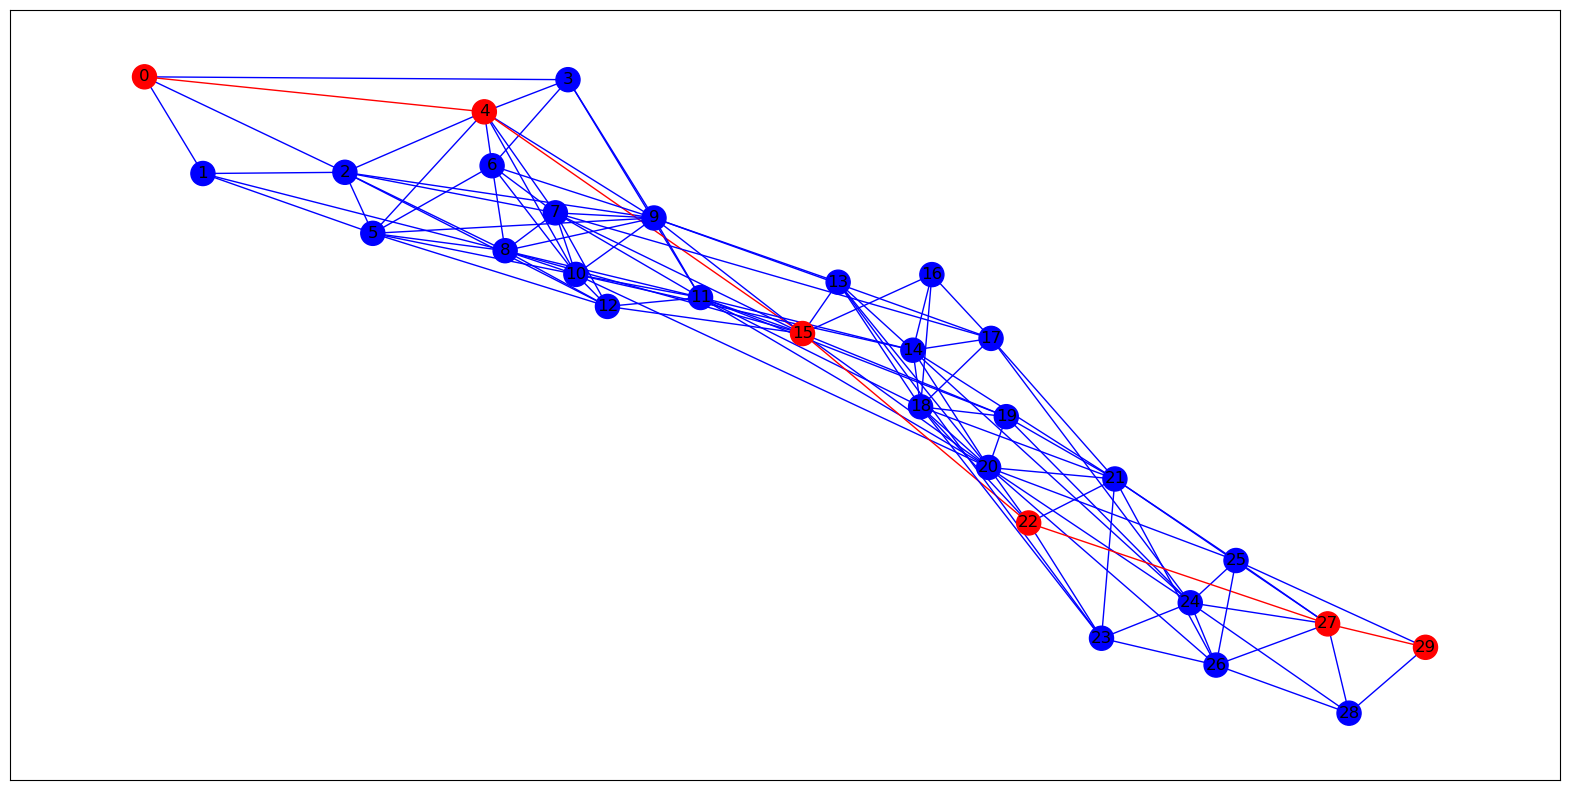

In [1756]:
nx_graph = nx.Graph()
for node, edges in graph.items():
    for neighbor, weight in edges.items():
        nx_graph.add_edge(int(node), int(neighbor), weight=float(weight))

shortest_path =  [int(node) for node in shortest_path]  

node_colors = ['red' if node in shortest_path else 'blue' for node in nx_graph.nodes()]

edge_colors = ['red' if (u, v) in zip(shortest_path[:-1], shortest_path[1:]) else 'blue' for u, v in nx_graph.edges()]

positions = nx.spring_layout(nx_graph, k=0.1, iterations=100)  
nx.draw_networkx(nx_graph, positions, node_color=node_colors, edge_color=edge_colors, with_labels=True, node_size=300)


plt.show()

**Comparing ACO with Dijkstra's algorithm**

In [1757]:
shortest_path = nx.dijkstra_path(nx_graph, source=0, target=29)
shortest_path

[0, 4, 15, 22, 27, 29]